In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from tensorflow.keras.regularizers import l2

In [45]:
train_dir = r"C:\Users\gopic\Desktop\ml intern training\data set\English.Alphabet.Dataset\English Alphabet Dataset"
test_dir = r"C:\Users\gopic\Desktop\ml intern training\data set\LicensePlateDetector-master1\LicensePlateDetector-master\train20X20"
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(60,60),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(60,60),batch_size=32,class_mode = "binary")

Found 7730 images belonging to 26 classes.
Found 920 images belonging to 26 classes.


In [46]:
training_set

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(60,60, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26,kernel_regularizer=l2(0.01),activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
history = model.fit(training_set,validation_data=test_set,epochs=5)

Epoch 1/5
242/242 [==============================] - 122s 498ms/step - loss: 0.9974 - accuracy: 0.7894 - val_loss: 0.6020 - val_accuracy: 0.8783
Epoch 2/5
242/242 [==============================] - 92s 377ms/step - loss: 0.2891 - accuracy: 0.9595 - val_loss: 0.4632 - val_accuracy: 0.9141
Epoch 3/5
242/242 [==============================] - 97s 399ms/step - loss: 0.2050 - accuracy: 0.9794 - val_loss: 0.3671 - val_accuracy: 0.9228
Epoch 4/5
242/242 [==============================] - 94s 387ms/step - loss: 0.1576 - accuracy: 0.9851 - val_loss: 0.4635 - val_accuracy: 0.8826
Epoch 5/5
242/242 [==============================] - 94s 389ms/step - loss: 0.1364 - accuracy: 0.9868 - val_loss: 0.3873 - val_accuracy: 0.8989


In [49]:
from matplotlib.image import imread

In [25]:
img=imread(r"C:\Users\gopic\Desktop\ml intern training\data set\English.Alphabet.Dataset\English Alphabet Dataset\M\m.png")
img=img[:,:,:3]

In [26]:
img.shape

(81, 44, 3)

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(1, 60, 60, 3)

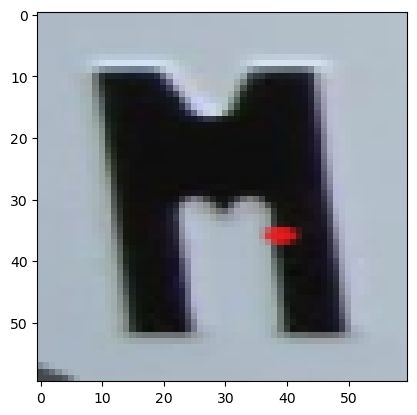

In [32]:
aa=cv2.resize(img,(60,60))
aaa=aa.reshape((1,60,60,3))
#color_image = np.repeat(aaa, 3, axis=-1)
plt.imshow(aa,cmap='gray')
aaa.shape

In [33]:
pred=model.predict(aaa)
pred.argmax()

1/1 [==============================] - 0s 173ms/step


12

In [50]:
model.save(r"C:\Users\gopic\Desktop\ml intern training\pretrained_models\text")

INFO:tensorflow:Assets written to: C:\Users\gopic\Desktop\ml intern training\pretrained_models\text\assets


INFO:tensorflow:Assets written to: C:\Users\gopic\Desktop\ml intern training\pretrained_models\text\assets


# number classification

In [51]:
train_dir = r"C:\Users\gopic\Desktop\ml intern training\data set\number_data\train"
test_dir = r"C:\Users\gopic\Desktop\ml intern training\data set\number_data\test"
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(60,60),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(60,60),batch_size=32,class_mode = "binary")

Found 3198 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [52]:
model_num = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(60,60, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,kernel_regularizer=l2(0.01),activation=tf.nn.softmax)
])
model_num.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
history = model_num.fit(training_set,validation_data=test_set,epochs=5)

Epoch 1/5
100/100 [==============================] - 38s 358ms/step - loss: 0.7444 - accuracy: 0.8186 - val_loss: 0.1392 - val_accuracy: 0.9967
Epoch 2/5
100/100 [==============================] - 31s 311ms/step - loss: 0.1630 - accuracy: 0.9822 - val_loss: 0.0873 - val_accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 32s 322ms/step - loss: 0.1105 - accuracy: 0.9897 - val_loss: 0.0730 - val_accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 32s 323ms/step - loss: 0.0824 - accuracy: 0.9959 - val_loss: 0.0627 - val_accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 34s 335ms/step - loss: 0.0757 - accuracy: 0.9941 - val_loss: 0.0558 - val_accuracy: 1.0000


In [54]:
model_num.save(r"C:\Users\gopic\Desktop\ml intern training\pretrained_models\num")

INFO:tensorflow:Assets written to: C:\Users\gopic\Desktop\ml intern training\pretrained_models\num\assets


INFO:tensorflow:Assets written to: C:\Users\gopic\Desktop\ml intern training\pretrained_models\num\assets
